               Q1 2020  Q2 2020  Q3 2020  Q4 2020  Q1 2021  Q2 2021  Q3 2021  \
Headsets                                                                       
Meta (Oculus)       34       32       29       74       75       67       73   
DPVR                 7        8        8        4        6        9       10   
Pico                 6       10       11        3        3        6        6   
Others              53       50       52       19       16       18       11   

               Q4 2021  
Headsets                
Meta (Oculus)       80  
DPVR                 8  
Pico                 5  
Others               7   

Headsets  Meta (Oculus)  DPVR  Pico  Others
Q1 2020              34     7     6      53
Q2 2020              32     8    10      50
Q3 2020              29     8    11      52
Q4 2020              74     4     3      19
Q1 2021              75     6     3      16
Q2 2021              67     9     6      18
Q3 2021              73    10     6      11
Q4 2021        

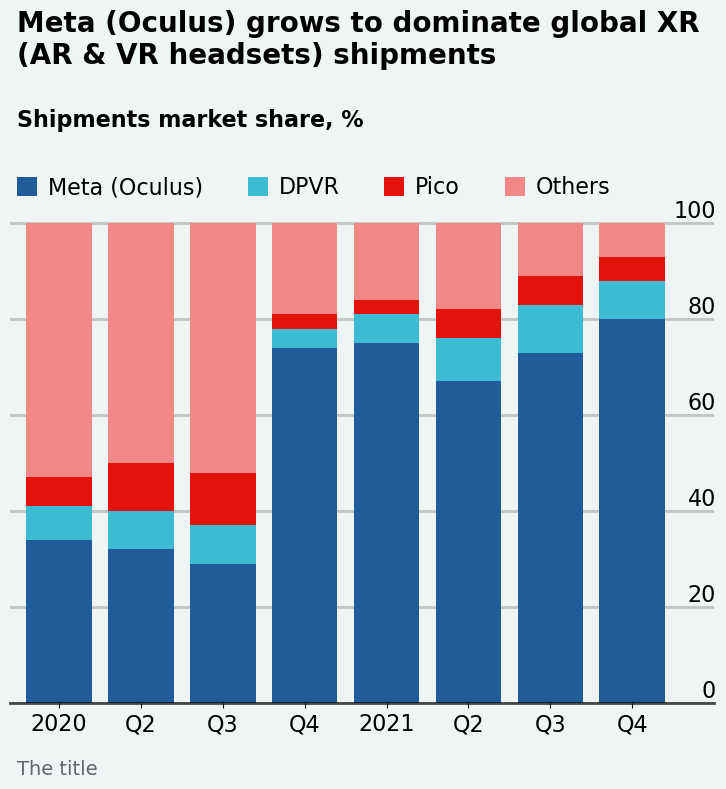

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

############################################################
#  Read data, explore data, transform dataframe
############################################################

# .csv file has a header.
df = pd.read_csv("xr_headsets.csv")

df.rename(columns = {'Global XR (AR & VR Headsets) Shipments Market Share':'Headsets'}, inplace = True)

# make the Headsets column become the index
df.set_index('Headsets', inplace=True)
print(df.head(5), '\n')

'''
               Q1 2020  Q2 2020  Q3 2020  ...  Q2 2021  Q3 2021  Q4 2021
Headsets                                  ...                           
Meta (Oculus)       34       32       29  ...       67       73       80
DPVR                 7        8        8  ...        9       10        8
Pico                 6       10       11  ...        6        6        5
Others              53       50       52  ...       18       11        7

[4 rows x 8 columns]
'''

# transpose the dataframe
df = df.transpose()
print(df.head(8))

print("\ndf.index")
print(df.index)

print("\ndf.columns")
print(df.columns)

# remove the label for the column index
df.columns.name = None

# make the index into a column
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'Headsets'})

print("\ndf.columns")
print(df.columns)

print(" ")
print(df)
print(" ")

# used to create the bar plot;  different from x-tick labels
labels = ['Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 
          'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021' ]

headsets = ['Meta (Oculus)', 'DPVR', 'Pico', 'Others'] 


#################################################################
#  COLORS
#################################################################

'''
# colors don't look right for this plot, 
# even though they were suggested by website
HongKong55 = '#36E2BD'
Tokyo45	   = '#C91D42'
Chicago30  = '#1F2E7A'
Chicago45  = '#2E45B8'
Chicago90  = '#D6DBF5'
Chicago95  = '#EBEDFA'    # large light blue rect bg 
BrightTurq = '#9ae5de'
'''

Paris95 = '#EFF5F5'   # main bg

# colors grabbed from actual The Economist charts
Red = '#e3120b'
Pink = '#f18885'
Aqua = '#3dbbd2'
FadedBlue = '#205c9a'

# tick and text font color
Slate = '#262A33' # dark grey


############################################################
#  Create Plot 
############################################################

# This code uses the OO-style matplotlib, using subplots().
fig, ax = plt.subplots(
    figsize = (8,9)    # dimensions of the figure in inches
)

fig.subplots_adjust(left=0.06,
    right=0.94,
    bottom=0.14,
    top=0.70)

ax.set_facecolor(Paris95)          # set axes bg
fig.patch.set_facecolor(Paris95)   # figure bg  


############################################################
#  Grid, Spines, Ticks 
############################################################

# horizontal grid lines
ax.grid( axis='y', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(True)  # Ticks and gridlines are *below* all Artists.

# remove all spines, except the bottom spine
ax.spines[['top','right','left']].set_visible(False)

ax.spines['bottom'].set(linewidth=2, alpha=0.7)


x_tick_labels = ['2020', 'Q2', 'Q3', 'Q4', 
                 '2021', 'Q2', 'Q3', 'Q4' ]  # for x-axis
ax.set_xticks( range(8), labels = x_tick_labels,
               fontsize=16)

#print(f"xlim is {ax.get_xlim()}")  # (0.0, 7.0)
ax.set_xlim( -0.6, 8.0)  # extend the length of the x-axis on both sides
                         # without changing which tick marks appear
#print(f"xticklabels is {ax.get_xticklabels()}")


y_tick_labels = range(0,101,20)  # Set labels again
ax.set_yticks( range(0,101,20), labels = y_tick_labels,
    ha = 'right',   # Set horizontal alignment to right
    va = 'bottom'   # Set vertical align. to make labels above gridline
)

# Avoid, since this causes a UserWarning: 
# FixedFormatter should only be used together with FixedLocator
# ax.set_yticklabels(y_tick_labels) 

ax.yaxis.set_tick_params(
    pad=-2,             # Pad tick labels so they don't go over y-axis
    labeltop=True,      # Put x-axis labels on top
    labelbottom=False,  # Set no x-axis labels on bottom
    bottom=False,       # Set no ticks on bottom
    labelsize=16)       # Set tick label size


############################################################
#  Bar Plot 
############################################################

# parameter bottom is to stack the bars on top of the other bars.
headsets = ['Meta (Oculus)', 'DPVR', 'Pico', 'Others'] 
y3 = df[headsets[3]]
y2 = df[headsets[2]]
y1 = df[headsets[1]]
y0 = df[headsets[0]]

# but reverse the order top to bottom
ax.bar(labels, y0, color=FadedBlue, label=headsets[0])
ax.bar(labels, y1, color=Aqua, bottom=y0, label=headsets[1])
ax.bar(labels, y2, color=Red, bottom=y0+y1, label=headsets[2])
ax.bar(labels, y3, color=Pink, bottom=y0+y1+y2, label=headsets[3])


############################################################
#  Legend 
############################################################

ax.legend(
    loc=(0.01,1),      # move to top left
    ncol=4,
    frameon=False,     # remove border
    borderpad=0,       # remove padding just inside the border
    handlelength=0.9,  # length of the various color rectangles.
    handleheight=0.9,  # default height is 0.7
    handletextpad=0.5, # pad bet legend handle and text
    fontsize=16)


############################################################
#  Red Tag (Rectangle) at the Top 
############################################################

ax.plot([0.075, 0.16],               # Set width of line
        [0.94, 0.94],                # Set y of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False,
        color=Red,
        linewidth=8)


#########################################################################
#  Title Area
#########################################################################

# main title above everything else
plt.figtext(0.069, 0.85,
    "Meta (Oculus) grows to dominate global XR\n(AR & VR headsets) shipments", 
    fontsize=20,
    fontweight='bold')

# text just below the title
plt.figtext(0.069, 0.78,
    "Shipments market share, %",
    ha="left",
    fontsize=16,
    fontweight='bold')


#########################################################################
#  Footer
#########################################################################

plt.figtext(0.069, 0.06,
    "The title",
    ha="left",
    fontsize=14,
    color=Slate,
    alpha=0.7)

plt.savefig('day12_TheEconomist.png')
